In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nf_data = pd.read_csv("D:\School\SpringBoard-BAnderson1214\data.csv")
nf_data.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,520476.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1232113.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,213209.0,"AD, AE, AG, AO, BH, BM, BS, BZ, CI, CM, CO, CR..."
3,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,447667.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1117918.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."


In [5]:
nf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20609 entries, 0 to 20608
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19997 non-null  object 
 1   type                20609 non-null  object 
 2   genres              20279 non-null  object 
 3   releaseYear         20576 non-null  float64
 4   imdbId              19130 non-null  object 
 5   imdbAverageRating   18945 non-null  float64
 6   imdbNumVotes        18945 non-null  float64
 7   availableCountries  20609 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [6]:
nf_data.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,20576.000000,18945.000000,1.894500e+04
mean,2013.161693,6.398955,3.136480e+04
std,14.358143,1.098073,1.199187e+05
min,1913.000000,1.200000,5.000000e+00
25%,2011.000000,5.700000,3.250000e+02
50%,2018.000000,6.500000,1.579000e+03
75%,2021.000000,7.200000,1.000700e+04
max,2025.000000,9.500000,2.991460e+06


In [7]:
nf_data.isnull().sum()

title                  612
type                     0
genres                 330
releaseYear             33
imdbId                1479
imdbAverageRating     1664
imdbNumVotes          1664
availableCountries       0
dtype: int64

In [9]:
nf_data.isnull().mean()*100

title                 2.969576
type                  0.000000
genres                1.601242
releaseYear           0.160124
imdbId                7.176476
imdbAverageRating     8.074142
imdbNumVotes          8.074142
availableCountries    0.000000
dtype: float64

In [13]:
nf_data.dropna(subset=['title', 'genres', 'releaseYear'], inplace=True)
nf_data.isnull().sum()

title                   0
type                    0
genres                  0
releaseYear             0
imdbId                699
imdbAverageRating     880
imdbNumVotes          880
availableCountries      0
dtype: int64

In [14]:
nf_data.isnull().mean()*100

title                 0.000000
type                  0.000000
genres                0.000000
releaseYear           0.000000
imdbId                3.525851
imdbAverageRating     4.438840
imdbNumVotes          4.438840
availableCountries    0.000000
dtype: float64

# At this point, I have dropped rows with missing titles, genres and release year.  Not having this information will not help me.
# I am going to assume any missing values in the ratings and num votes columns mean that they are zero

In [15]:
nf_data['imdbAverageRating'].fillna(0, inplace=True)
nf_data['imdbNumVotes'].fillna(0, inplace=True)
nf_data.isnull().sum()

title                   0
type                    0
genres                  0
releaseYear             0
imdbId                699
imdbAverageRating       0
imdbNumVotes            0
availableCountries      0
dtype: int64

# I do not want to lose the rows missing an ID.  First, I am going to check for duplicates and then try to emulate IDs for these rows

In [17]:
# Check for duplicate rows
duplicates = nf_data[nf_data.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [title, type, genres, releaseYear, imdbId, imdbAverageRating, imdbNumVotes, availableCountries]
Index: []


# Good, no duplivated data

In [20]:
import random

# Function to generate a random IMDb ID like 'tt1234567'
def generate_random_imdbid():
    return 'tt' + ''.join([str(random.randint(0, 9)) for _ in range(7)])

# Replace missing imdbId with randomly generated IMDb IDs
nf_data['imdbId'] = nf_data['imdbId'].apply(lambda x: generate_random_imdbid() if pd.isnull(x) else x)


In [21]:
nf_data.isnull().sum()

title                 0
type                  0
genres                0
releaseYear           0
imdbId                0
imdbAverageRating     0
imdbNumVotes          0
availableCountries    0
dtype: int64

# What are the most common genres?

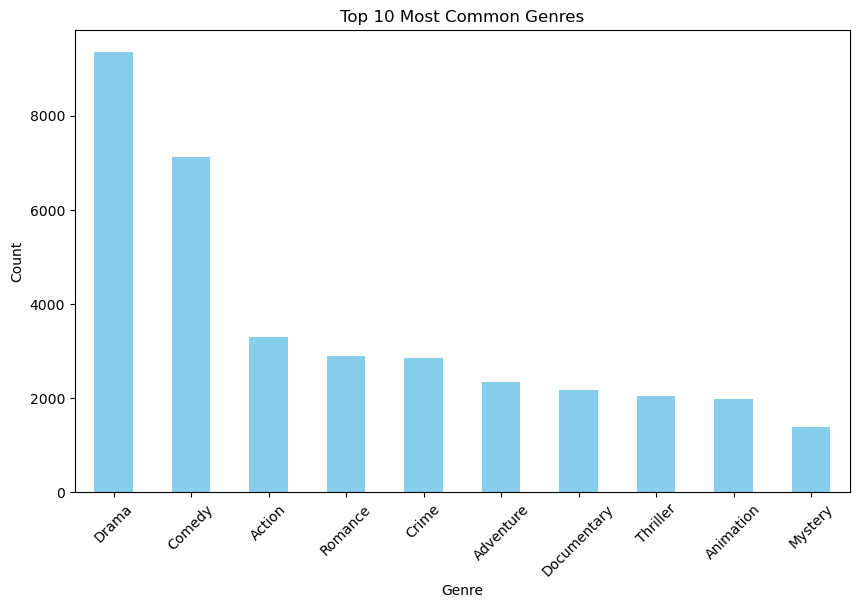

In [22]:
# Split genres and count occurrences
genre_counts = nf_data['genres'].str.split(', ', expand=True).stack().value_counts()

# Plot the top 10 genres
genre_counts.head(10).plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# How have the movie ratings changed over the years?

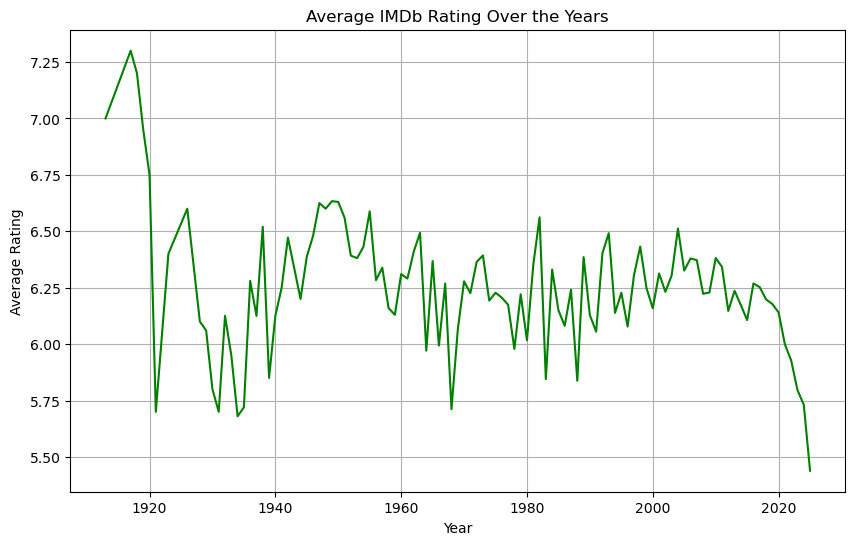

In [23]:
# Group by release year and calculate mean rating
avg_ratings_by_year = nf_data.groupby('releaseYear')['imdbAverageRating'].mean()

# Plot the trend
plt.figure(figsize=(10,6))
avg_ratings_by_year.plot(kind='line', color='green')
plt.title('Average IMDb Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


# Do higher-rated movies tend to have more votes?

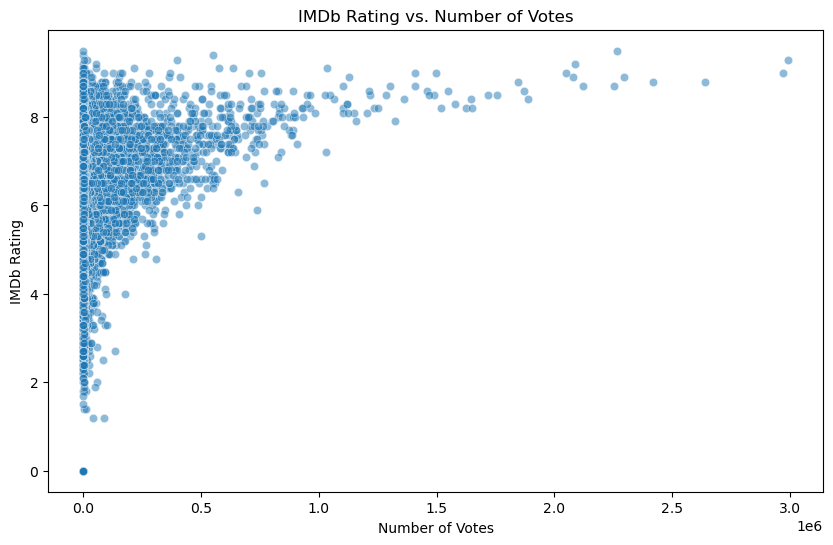

Correlation between IMDb Rating and Number of Votes: 0.17


In [24]:
# Scatter plot of ratings vs. number of votes
plt.figure(figsize=(10,6))
sns.scatterplot(x='imdbNumVotes', y='imdbAverageRating', data=nf_data, alpha=0.5)
plt.title('IMDb Rating vs. Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('IMDb Rating')
plt.show()

# Calculate correlation
correlation = nf_data['imdbAverageRating'].corr(nf_data['imdbNumVotes'])
print(f'Correlation between IMDb Rating and Number of Votes: {correlation:.2f}')


# Which countries have the highest number of movies releases?

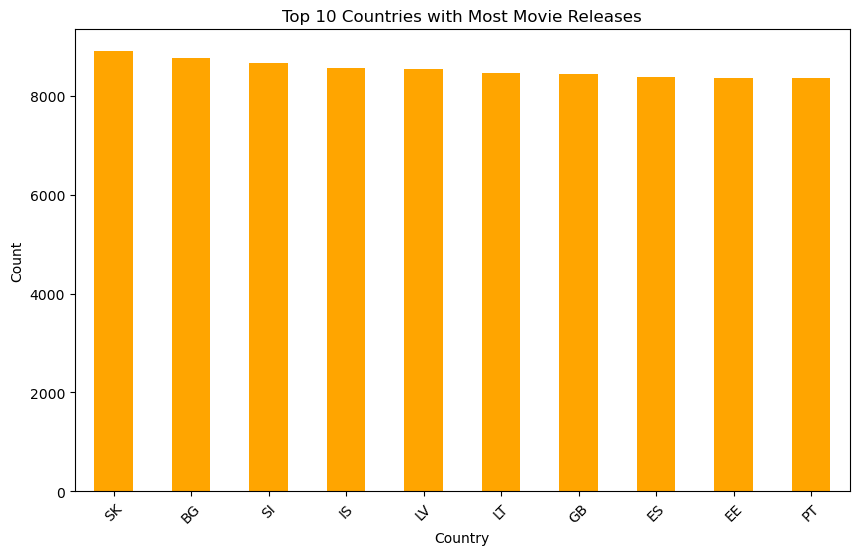

In [25]:
# Split availableCountries and count occurrences
countries_counts = nf_data['availableCountries'].str.split(', ', expand=True).stack().value_counts()

# Plot the top 10 countries with the most releases
countries_counts.head(10).plot(kind='bar', figsize=(10,6), color='orange')
plt.title('Top 10 Countries with Most Movie Releases')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# What is the relationship between movies and release year and genre?

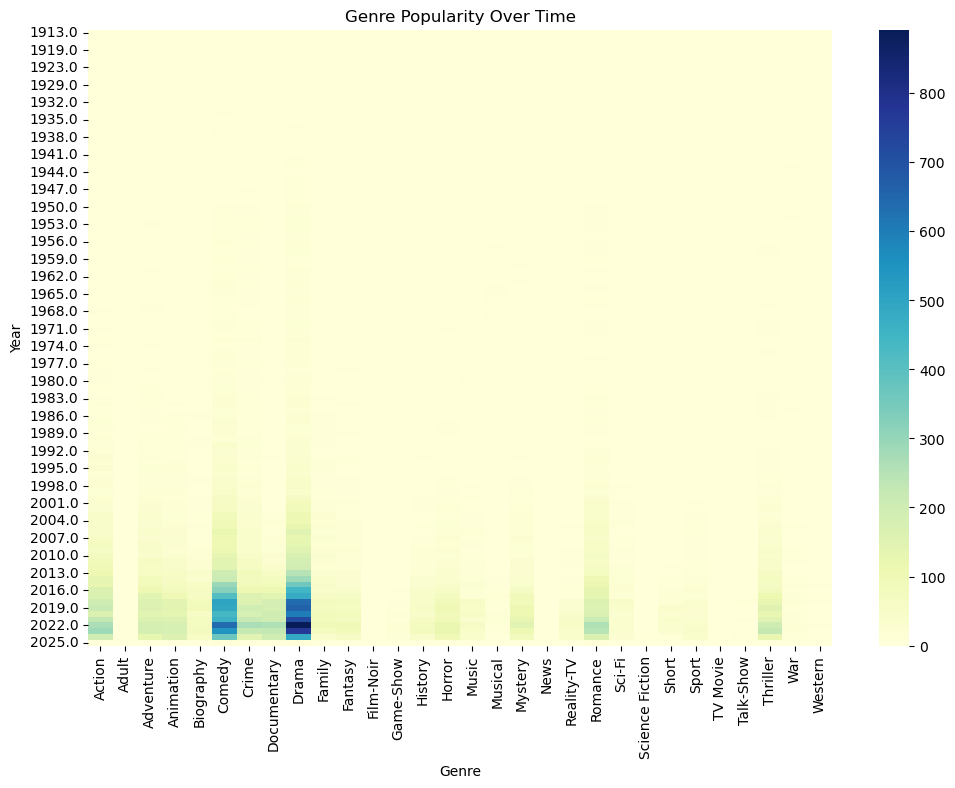

In [26]:
# Split genres into individual columns and count occurrences by year
genre_year_data = nf_data['genres'].str.split(', ', expand=True).stack().to_frame(name='Genre')
genre_year_data['Year'] = nf_data['releaseYear'].repeat(nf_data['genres'].str.split(', ').apply(len)).values

# Pivot for heatmap
genre_year_pivot = genre_year_data.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(genre_year_pivot, cmap='YlGnBu', cbar=True)
plt.title('Genre Popularity Over Time')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()
